Azis Muslim
- Bacth 13 FTDS
- Milestone 1 Phase 1
- Dataset : Credit Card Default

# Analisis Model Classifier Machine Learning Dalam Memprediksi Default Payment

## Latar Belakang Penelitian

Model prediksi default payment dalam suatu financial institutions memainkan peranan penting terlebih setelah terjadinya krisis subprime mortgage pada tahun 2008. Krisis Subprime mortgage yang terjadi di USA awalnya di awali dengan default nya salah satu investement bank terbesar di USA dan pada akhirnya merambat ke beberapa negara di eropa. Berdasarkan pelajaran yang di ambil dari krisis sebelumnya yang penyebab utamanya adalah credit default maka pada penelitian ini akan memfokuskan untuk melakukan analisa model machine learning dengan model prediksi yang dapat menyesuaikan dengan data-data perbankan terkini.

### Library yang digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore') 

## Loading Dataset

In [2]:
df = pd.read_csv('credit_card_default.csv')
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [3]:
df.tail(5)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


##**Explanatory Data Analysis & Feature Selection**

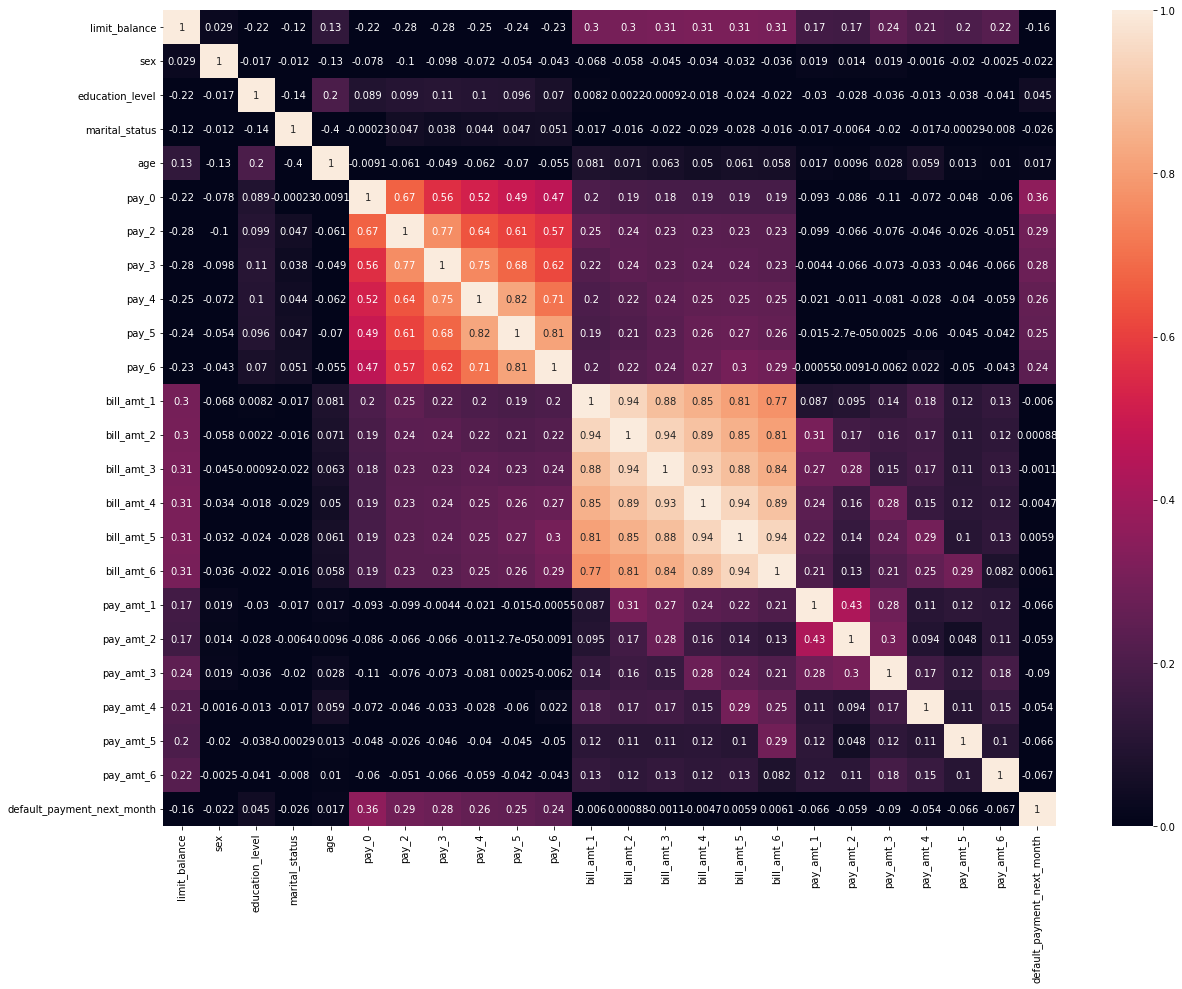

In [4]:
# Heatmap ini berguna untuk melihat korelasi antar fitur yang ada pada dataset credit default
corr = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

Pada penelitian ini variabel dependent yang digunakan adalah default_payment_next_month. Berdasarkan heatmap di atas dapat terlihat fitur-fitur yang memiliki korelasi tertinggi dalam memengaruhi variabel dependent adalah pay_0, Pay_2, pay_3, pay_4, pay_5, pay_6. Sehingga fitur-fitur tersebut akan dijadikan variabel independent pada penelitian ini untuk memprediksi default payment next month.

limit_balance adalah credit card limit yang ditetapkan oleh masing-masing bank pemberi kartu kredit atau batas maksimal nilai yang bisa dikeluarkan untuk melakukan transaksi keuangan. Pada heatmap di atas dapat terlihat limit balance memang tidak memiliki kaitan langsung dengan default_payment_next_month. Namun dari sudut pandang lain jika kita melihat bank sebagai lembaga intermediaries hal ini terkait karena semakin tinggi limit kredit yang diberikan oleh bank maka akan semakin tinggi juga jumlah tagihan kartu kreditnya. Jumlah tagihan yang lebih tinggi dapat meningkatkan risiko liquditas yang akan mengganggu bank dalam mengelola liquiditas nya. Menurut Mathew dan Thompson (2008) risiko liquiditas adalah probabilitas suatu bank tidak dapat mememenuhi kewajiban nya untuk memenuhi kewajiban liquiditasnya dikarenakan adanya penarikan deposit secara mendadak.

Seperti yang kita ketehui secara tradisional bank mendapatkan profit dari selisih bunga pinjaman dan bunga simpanan "interest rate margin". Jika default rate tinggi maka akan meningkatkan risiko bank dalam pengelolaan liquiditas nya. Pada penelitian sebelumnya yang bejudul 'The Fundamental Determinants of Credit Risk for European Large Complex Financial Institutions' oleh Robe, I dan Podpiera, J (2010) mendaptakan temuan bahwa semakin tinggi proporsi dari short term borrowing akan meningkatkan CDS spread nya.

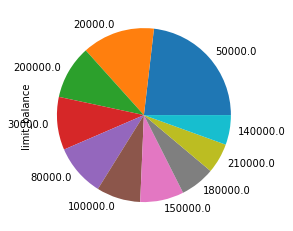

In [5]:
df['limit_balance'].value_counts().head(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

Berdasarkan pie chart di atas terlihat limit balance yang proporsi paling besar adalah kelompok yang limit balance nya di angka 50.000

In [6]:
# Creating a new dataframe with categorical variables
subset = df[['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 
               'pay_5', 'pay_6', 'default_payment_next_month']]

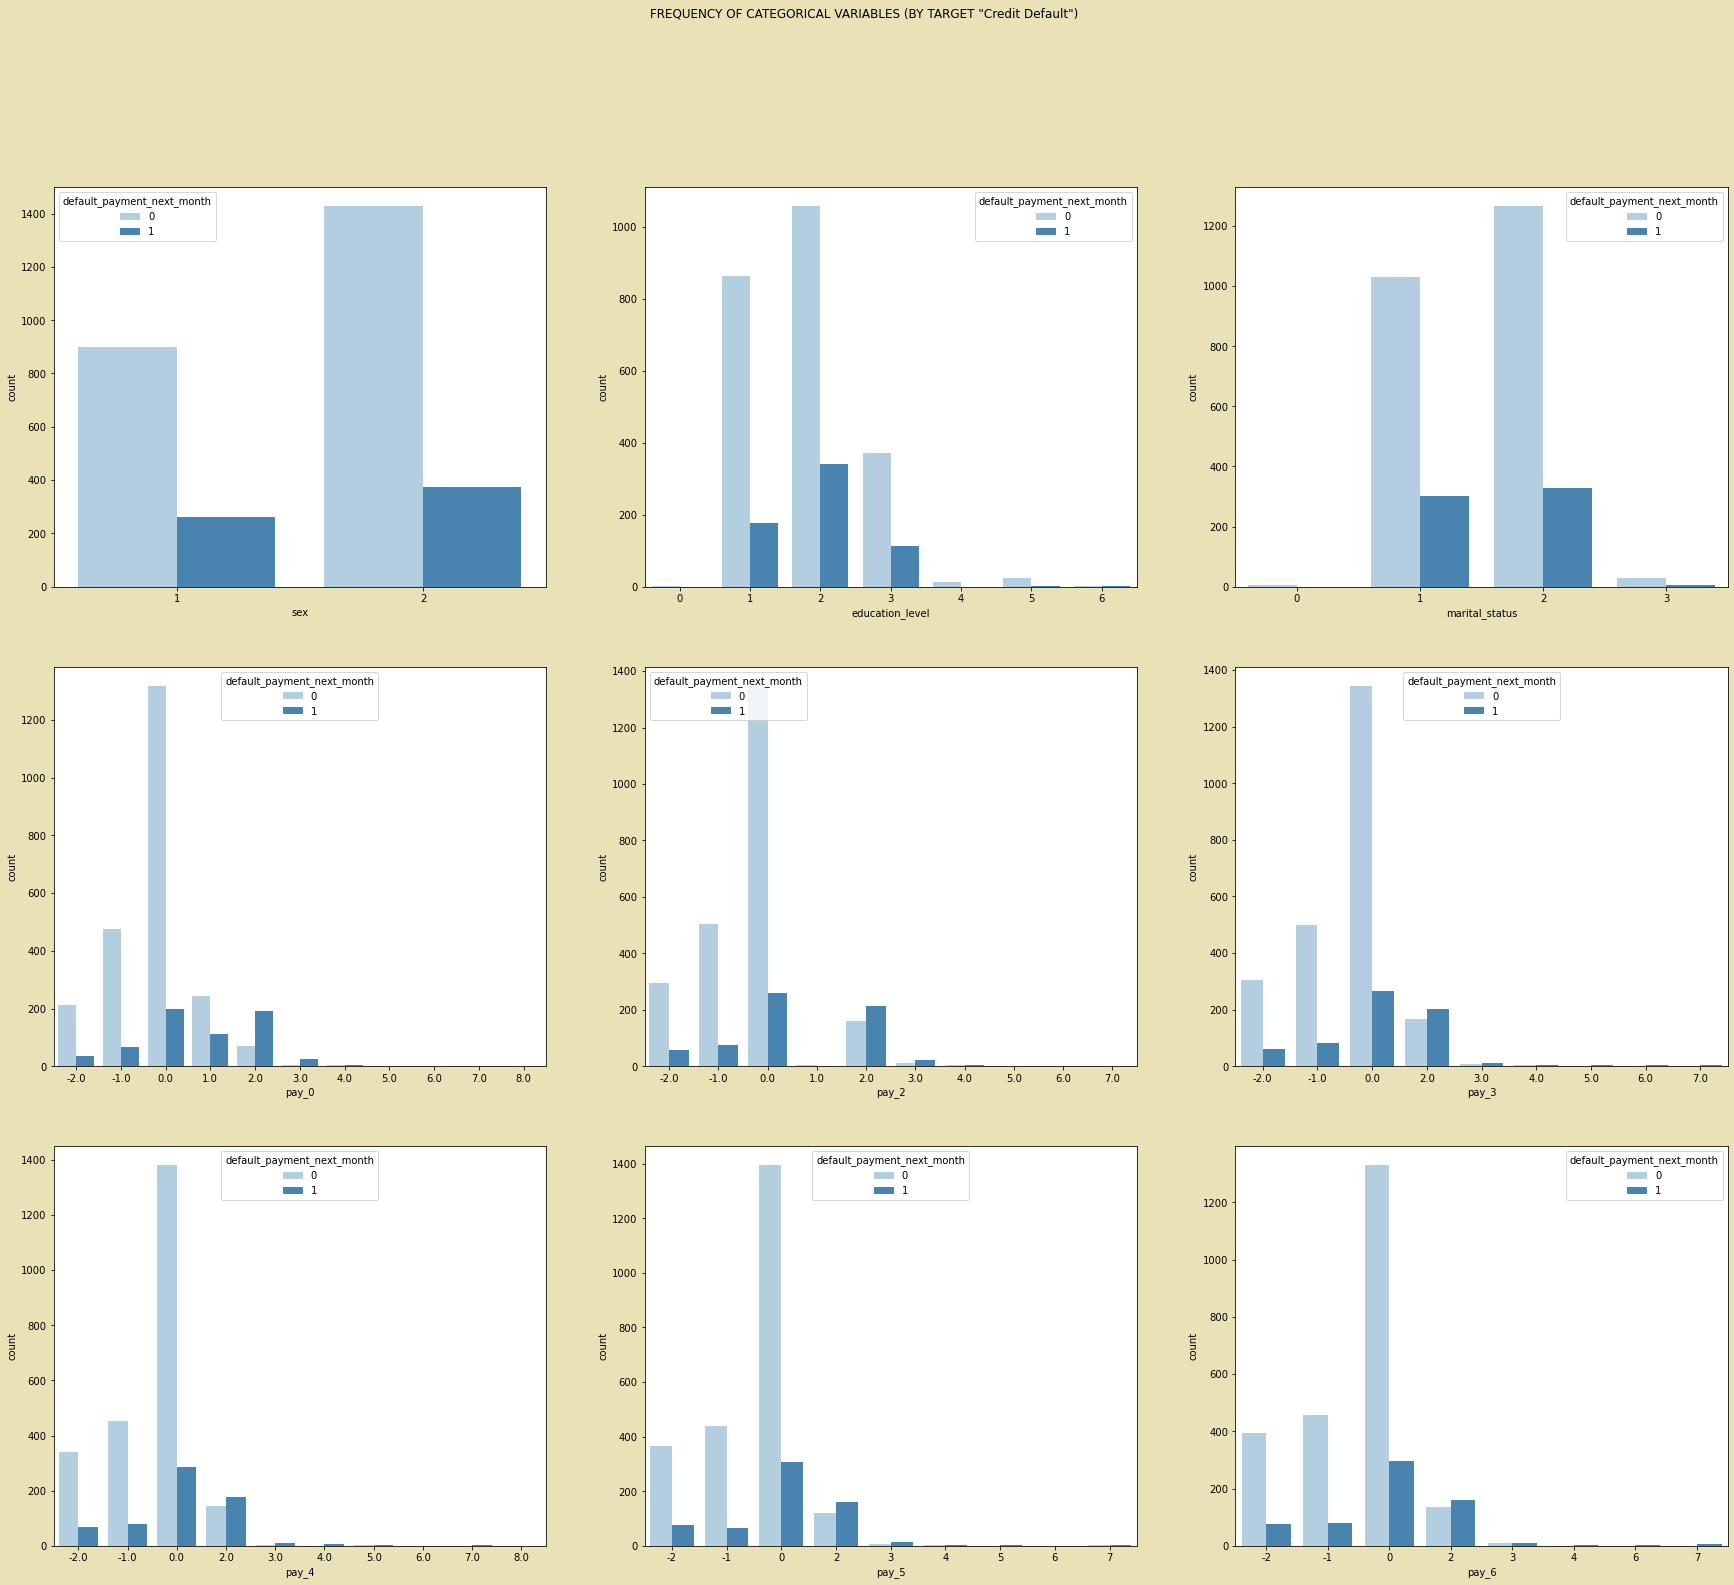

In [7]:
f, axes = plt.subplots(3, 3, figsize=(30, 25), facecolor='#eae2b7')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET "Credit Default")')
ax1 = sns.countplot(x="sex", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="education_level", hue="default_payment_next_month", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="marital_status", hue="default_payment_next_month", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="pay_0", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="pay_2", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="pay_3", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="pay_4", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="pay_5", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="pay_6", hue="default_payment_next_month", data=subset, palette="Blues", ax=axes[2,2]);

Berdasarkan gambar pada baris pertama dapat terlihat tidak ada perbedaan terlalu jauh untuk kredit default yang terjadi jika dikelompokkan berdasarkan gender sebagai catatan credit default di representasikan oleh barplot berwarna biru tua sedangkan barplot berwarna biru muda merepresentasikan tidak ada kredit default. Selanjutnya bar plot disebelahnya jika credit default di kelompokkan berdsarakan tigkat pendidikan dapat terlihat secara jelas credit defaut tertinggi terjadi pada kelompok pendidikan di angka 2,1, dan 3. Pada barplot marital status kondisinya tidak jauh berbeda dengan barplot sex dimana tidak ada beda terlalu jauh antara orang yang sudah menikah dan belum nikah dan masuk ke kelompok gagal bayar atau credit default. Lebih lanjut untuk barplot pay_0, pay_2, pay_3, pay_4, pay_5, dan pay_6 akan saya gunakan sebagai sebagai variabel independent untuk memprediksi default karena datanya cukup beragam antara kelompok yang default di angka -2, -1, 00, 2, dan 3 dimana angka tersebut di representasikan oleh sumbu X.




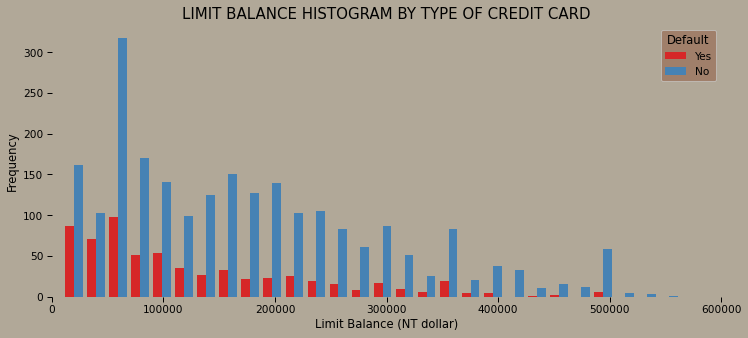

In [8]:
x1 = list(df[df['default_payment_next_month'] == 1]['limit_balance'])
x2 = list(df[df['default_payment_next_month'] == 0]['limit_balance'])

plt.figure(figsize=(12,5), facecolor='#B1A898', edgecolor='#EA8A2E')
sns.set_context('paper', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['#d62728', 'steelblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='#9C755F', fancybox=True)
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', size=15)
plt.box(False)

Pada bar chart di atas dapat menjelaskan bahwa limit balance yang tinggi memang memunculkan risiko liquiditas yang tinggi bagi bank namun untuk kasus ini semakin tinggi limit balance nya default rate nya cenderung menunjukkan trend yang semakin kecil sehingga risiko yang tinggi tersebut tidak perlu dijadikan concern utama pada kasus ini.

## Tahapan Penelitian

Pada penelitian ini model machine learning yang digunakan adalah Logistic Regression, Support Vector Classifier, K-Nearest Neighbor, Gaussian Naive Bias, Model Decision Tree, Bagging Classifier, ADA Boost With Logistic Regression As An Estimator, Gradient Boosting, Random Forest, dan XGBoost Classifier sebagai salah satu model diluar scikit learn library. Setelah itu hasil akurasi setiap model akan dibandingkan begitu juga hasil dari cross validationya baik yang di dasarkan cross validation berdasarkan rata-rata maupun cross validation yang di dasarkan dari nilai standar deviasinya. Akurasi dengan range 0,90-1 dapat dikatakan excellent classification, akurasi dengan range 0,80-0,90 dapat dikatakan good classification, akurasi dengan range 0,70-0,80 dikatakan fair classification, akurasi dengan range 0,60-0,70 dikatakan poor classification, dan akurasi dengan range 0,50-0,60 dikatakan sebagai failure classification

Model dengan akurasi terbaik dengan mempertimbangan cross validation mean dan cross validation standar deviasi akan dipilih untuk selanjutnya dilakukan hyperparamater tuning menggunakan Grid Search. Grid Search sendiri berguna untuk membantu pemilihan hyperparamater yang range angkanya sudah di persiapakn sehingga peneliti tidak perlu melakukan running model secara berulang kali.  

Tidak seperti angka akurasi dan standar deviasi yang nilainya semakin mendekati 1 merepresentasikan model semakin baik, sebaliknya untuk standar deviasi yang di hasilkan dari cross validation semakin kecil nilainya berarti model tersebut semakin kecil kemungkinananya dalam melakukan kesalahan klasifikasi

## Feature Selection

In [9]:
# Kode ini digunakan untuk mempermudah saya melihat kolom apa saja yang terdapat pada dataset
df.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

Berdasarkan penjelasan yang ada di EDA saya memilih limit balance, educational level, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6 sebagai variabel independent untuk memprediksi default_payment_next_month yang saya jadikan sebagai variabel dependent

In [10]:
df_copy = df[['limit_balance','education_level','pay_0','pay_2','pay_3','pay_amt_4','pay_amt_5','pay_amt_6','default_payment_next_month']]
df_copy.head(5)

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,0.0,0.0,0.0,2000.0,2000.0,2000.0,0
1,110000.0,1,0.0,0.0,0.0,3000.0,3000.0,1000.0,0
2,270000.0,1,0.0,0.0,0.0,2051.0,2000.0,0.0,0
3,130000.0,1,0.0,0.0,0.0,2354.0,2366.0,2291.0,0
4,50000.0,1,0.0,0.0,0.0,709.0,721.0,692.0,0


### Splitting dataset for model inference

In [11]:
data_inf = df_copy.sample(10, random_state=17)
data_inf.head(5)

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
91,420000.0,2,0.0,0.0,0.0,5900.0,6000.0,6000.0,0
325,30000.0,2,2.0,0.0,0.0,500.0,1500.0,0.0,1
47,40000.0,3,0.0,0.0,0.0,6000.0,2000.0,2000.0,0
1488,70000.0,3,0.0,0.0,-1.0,3150.0,2000.0,4000.0,0
446,60000.0,2,-1.0,0.0,-1.0,200.0,1832.0,5889.0,0


In [12]:
data_train_test = df_copy.drop(data_inf.index)
data_train_test.head(5)

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,0.0,0.0,0.0,2000.0,2000.0,2000.0,0
1,110000.0,1,0.0,0.0,0.0,3000.0,3000.0,1000.0,0
2,270000.0,1,0.0,0.0,0.0,2051.0,2000.0,0.0,0
3,130000.0,1,0.0,0.0,0.0,2354.0,2366.0,2291.0,0
4,50000.0,1,0.0,0.0,0.0,709.0,721.0,692.0,0


In [13]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf.head(5)

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,420000.0,2,0.0,0.0,0.0,5900.0,6000.0,6000.0,0
1,30000.0,2,2.0,0.0,0.0,500.0,1500.0,0.0,1
2,40000.0,3,0.0,0.0,0.0,6000.0,2000.0,2000.0,0
3,70000.0,3,0.0,0.0,-1.0,3150.0,2000.0,4000.0,0
4,60000.0,2,-1.0,0.0,-1.0,200.0,1832.0,5889.0,0


In [14]:
x = data_train_test.drop('default_payment_next_month', axis=1)
y = data_train_test['default_payment_next_month']
x.head(5)

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000.0,1,0.0,0.0,0.0,2000.0,2000.0,2000.0
1,110000.0,1,0.0,0.0,0.0,3000.0,3000.0,1000.0
2,270000.0,1,0.0,0.0,0.0,2051.0,2000.0,0.0
3,130000.0,1,0.0,0.0,0.0,2354.0,2366.0,2291.0
4,50000.0,1,0.0,0.0,0.0,709.0,721.0,692.0


## Splitting Dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=17)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (2364, 8)
Test Size : (591, 8)


In [16]:
X_train.head()

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_amt_4,pay_amt_5,pay_amt_6
810,120000.0,1,-1.0,0.0,0.0,5000.0,5000.0,4000.0
2575,160000.0,2,1.0,-1.0,-1.0,1496.0,1496.0,1496.0
366,100000.0,3,0.0,0.0,0.0,1589.0,2000.0,1506.0
2622,170000.0,2,-1.0,-1.0,-1.0,648.0,0.0,631.0
2891,110000.0,2,1.0,-1.0,-1.0,0.0,0.0,0.0


## Detecting Missing Value

In [17]:
X_train.isna().sum()

limit_balance      0
education_level    0
pay_0              0
pay_2              0
pay_3              0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

Setelah di lakukan pengecekan tidak ada missing value pada X_train

In [18]:
y_train.isna().sum()

0

Setelah di lakukan pengecekan pada y_train hasilnya tidak ditemukan  missing value pada variabel tersebut

In [19]:
X_test.isna().sum()

limit_balance      0
education_level    0
pay_0              0
pay_2              0
pay_3              0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

Setelah di lakukan pengecekan pada X_test tidak ditemukan adanya missing value

In [20]:
y_test.isna().sum()

0

Setelah di lakukan pengecekan pada y_test tidak ditemukan adanaya missing value.

## Detecting Outliers

Pada penelitian ini tidak dilakukan handling outlier karena dataset yang digunakan sangat sensitif jika dilakukan handling outlier seperti yang kita tahu bahwa persebaran data yang jauh dari persebaran data secara umum pada penelitian ini masih merepresentasikan data sebenarnya dan akan berpengaruh pada hasil penelitian. Namun akan dilakukan pengecekan outlier.

### Splitting antara Numerical dan Categorical Data

In [21]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  []


In [22]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [23]:
def find_skewed_boundaries(df_copy, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [24]:
upper_limit,lower_limit=find_skewed_boundaries(X_train_num,'limit_balance')

In [25]:
print('Total data: {}'.format(len(X_train_num)))
print('(right end outliers) : {}'.format(len(X_train_num[X_train_num['limit_balance'] > upper_limit])))
print('(left end outliers.  : {}'.format(len(X_train_num[X_train_num['limit_balance'] < lower_limit])))
print('')
print('% right end outliers : {}'.format(len(X_train_num[X_train_num['limit_balance'] > upper_limit]) / len(X_train_num) * 100))
print('% left end outliers  : {}'.format(len(X_train_num[X_train_num['limit_balance'] < lower_limit]) / len(X_train_num) * 100))

Total data: 2364
(right end outliers) : 10
(left end outliers.  : 0

% right end outliers : 0.4230118443316413
% left end outliers  : 0.0


setelah dilakukan pengecekan outlier yang terdeteksi ada di angka 4.2 %

## Modeling and Defining The Pipeline

In [26]:
numeric_features = ["pay_0","pay_2","pay_3","pay_amt_4","pay_amt_5","pay_amt_6"]
numeric_features2 = ["limit_balance","education_level"]

numeric_transformer_mms = Pipeline([("scaler", MinMaxScaler())])

numeric_transformer_sc = Pipeline([("scaler2", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num1", numeric_transformer_mms, numeric_features),
        ("num2", numeric_transformer_sc, numeric_features2),
    ]
)

## Logistic Regression

Logistic regression adalah salah satu model machine learning yang seringkali digunakan untuk klasifikasi dan prediktif analysis. Logistic regression melakukan estimasi probabilitas pada sebuah kejadian seperti apakah seseorang akan keluar saat weekend atau tidak, dimana estimasi tersebut di dasarkan pada variable independent yang tersedia pada dataset. Selama outcome yang di hasilkan adalah sebuah probabilitas nilai dari variabel dependent ada pada range 0 sampai 1.

In [27]:
pipe = Pipeline([("prep", preprocessor), ("Logistic", LogisticRegression())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['limit_balance',
                                                   'education_level'])])),
                ('Logistic', LogisticRegression())])

### Model Evaluation Logistic Regression

In [28]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [29]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.8138747884940778
accuracy score test :  0.8206429780033841


## Cross Validation for Logistic Regression

In [30]:
LogReg = LogisticRegression()
print(cross_val_score(LogReg, X_train, y_train, cv=10, scoring='accuracy').mean())

0.7931452478009011


In [31]:
LogReg = LogisticRegression()
print(cross_val_score(LogReg, X_train, y_train, cv=10, scoring='accuracy').std())

0.013314581855509799


Berdasarkan pengecekan model logred dengan cross validation di dapat standard deviation terbaiknya adalah 0.001227339953032019.

Secara default cross validation dilakukan sebanyak 5 kali namun pada bagian ini cv di setup sebanyak 10 kali untuk melihat hasil terbaiknya dan di dapat angka akurasi 0.78

## Support Vector Classifier

Support vector classifier adalah model machine learning yang bekerja dengan menggunakan hyperplane untuk melakukan klasifikasi pada pada sebuah persebaran data. Support vector classifier sendiri memiliki beberapa paramater yang dapat disesuaikan bergantung dengan persebaran datanya. Salah satu parameter yang paling sering digunakan adalah kernel, pada hyperparameter ini dapat disesuaikan jika persebaran datanya tidak linear biasanya kernel yang digunakan adalah tipe poly namun jika persebaran datanya linear tipe kernel yang digunakan adalah rbf. Paramater lain yang bisanya sering digunakan adalah degree yang secara default angkanya 3 namun ini jika tipe kernel yang digunakan adalah polynomial. Kekurangan yang perlu di perhatikan pada penggunaam model ini adalah waktu komputasinya yang cukup lama.

In [32]:
pipe = Pipeline([("prep", preprocessor), ("SVM", SVC())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['limit_balance',
                                                   'education_level'])])),
                ('SVM', SVC())])

## Model Evaluation Support Vector Classifier

In [33]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [34]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.8286802030456852
accuracy score test :  0.817258883248731


## Cross Validation for SVC

In [35]:
SVMC = SVC()
print(cross_val_score(SVMC, X_train, y_train, cv=10, scoring='accuracy').mean())

0.7846867624973182


In [36]:
SVMC = SVC()
print(cross_val_score(SVMC, X_train, y_train, cv=10, scoring='accuracy').std())

0.001227339953032019


## Model KNN

Model K-Nearest neighbor adalah salah satu model machine learning yang diguanakan untuk melakukan klasifikasi. Cara kerja model KNN adalah dengan mencari nilai terdekatnya untuk di masukkan ke dalam kelas yang sama. Kekurangan dari model ini terletak pada cara model ini bekerja, karena bisa saja ada secara jarak data tersebut masuk ke dalam kelas 1 namun secara karakteristik data tersebut seharusnya masuk ke dalam kelas 2. Model ini juga memiliki hyperparameter yang dapat di sesuaikan dengan kebutuhan misalnya neighbornya bisa ditentukan biasanya angka yang di pilih adalah ganjil.

In [37]:
pipe = Pipeline([("prep", preprocessor), ("KNN", KNeighborsClassifier())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['limit_balance',
                                                   'education_level'])])),
                ('KNN', KNeighborsClassifier())])

In [38]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [39]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.8574450084602369
accuracy score test :  0.8155668358714044


## Cross Validation for KNN Model

In [40]:
KnnClassifier = KNeighborsClassifier()
print(cross_val_score(KnnClassifier, X_train, y_train, cv=10, scoring='accuracy').mean())

0.7576289065293571


In [41]:
KnnClassifier = KNeighborsClassifier()
print(cross_val_score(KnnClassifier, X_train, y_train, cv=10, scoring='accuracy').std())

0.02500809052441026


## Gaussian Naive Bias

Naive Bias theorm adalah teori yang menghitung probabilitas dari kejadian A yang terjadi di bagi dengan probabilitas kejadian B. Kekurangan model ini adalah pada masalah probabilitas. Naive Bayes memiliki masalah probabilitas nol. Salah satu hyperparamater yang bisa digunakan pada model ini adalah  var_smoothing yang secara default ada di angak 1e-09.

In [42]:
pipe = Pipeline([("prep", preprocessor), ("Naive Bias", GaussianNB())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['limit_balance',
                                                   'education_level'])])),
                ('Naive Bias', GaussianNB())])

In [43]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [44]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.7284263959390863
accuracy score test :  0.7326565143824028


## Cross Validation for Gaussian Naive Bias

In [45]:
NaiveBias = GaussianNB(priors=None, var_smoothing=1e-09)
print(cross_val_score(NaiveBias, X_train, y_train, cv=10, scoring='accuracy').mean())

0.4115854966745334


In [46]:
NaiveBias = GaussianNB(priors=None, var_smoothing=1e-09)
print(cross_val_score(NaiveBias, X_train, y_train, cv=10, scoring='accuracy').std())

0.03872602112118586


## Model Decision Tree

Model decision tree adalah suatu binary tree yang akan terus melakukan split pada data sampai node leaf atau sampai gini impurity nya 0 atau bisa juga dikatakan sampai mencapai purity.

In [47]:
pipe = Pipeline([("prep", preprocessor), ("Decision Tree Classifier", DecisionTreeClassifier())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['limit_balance',
                                                   'education_level'])])),
                ('Decision Tree Classifier', DecisionTreeClassifier())])

In [48]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [49]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.9949238578680203
accuracy score test :  0.7208121827411168


## Cross Validation Model Decision Tree

In [50]:
DecisionTreeClass = DecisionTreeClassifier()
print(cross_val_score(DecisionTreeClass, X_train, y_train, cv=10, scoring='accuracy').mean())

0.7478992347850962


In [51]:
DecisionTreeClass = DecisionTreeClassifier()
print(cross_val_score(DecisionTreeClass, X_train, y_train, cv=10, scoring='accuracy').std())

0.029984934407684335


## Bagging Classifiers

Bagging adalah sebuah teknik untuk meningkatkan akurasi prediksi suatu model pada algortima supervised learning. Ide dasar dari begging classifier adalah dengan melakukan train pada sejumlah model machine learning berdasarkan dataset yang dipilih secara acak dari train data dan model ini akan melakukan voting berdasarkan model-model yang dibangun dari data train yang di ambil secara acak. Bebeda dengan boosting cara kerja model ini adalah dengan melakukan evaluasi pada setiap model yang datanya di ambil secara acak dari train dan model secara simultaniously berjalan untuk memberikan hasil prediksi. Hasil prediksi yang di dapat dari model ini di ambil berdasarkan voting. Mislanya dari lima model output yang paling banyak adalah 1 maka 1 akan dijadikan sebagai hasil prediksi dari begging classifiers

Kelebihan utama dari bagging classifier adalah model ini dapat menurunkan variance dari sebuah model prediksi algoritma supervised machine learning tanpa secara signifikan menurunkan tingkat akurasinya.

In [52]:
pipe = Pipeline([("prep", preprocessor), ("Bagging Classifiers", BaggingClassifier())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['limit_balance',
                                                   'education_level'])])),
                ('Bagging Classifiers', BaggingClassifier())])

In [53]:
bag_clf_pred = pipe.predict(X_test)
bag_clf_pred_train = pipe.predict(X_train)

In [54]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.9949238578680203
accuracy score test :  0.7208121827411168


## Cross Validation For Bagging Classifier

In [55]:
BaggClass = BaggingClassifier()
print(cross_val_score(BaggClass, X_train, y_train, cv=10, scoring='accuracy').mean())

0.815576056640206


In [56]:
BaggClass = BaggingClassifier(n_estimators=20)
print(cross_val_score(BaggClass, X_train, y_train, cv=10, scoring='accuracy').std())

0.0226402026369705


## ADA Boost with LogReg Base Estimator

Metode AdaBoost merupakan salah satu algoritma supervised pada data mining yang diterapakan secara luas untuk membuat model klasifikasi. ADA boost sendiri adalah suato model boosting yang base estimatornya dapat di kolaborasikan dengan model machine learning lainya seperti support vector classifier.

In [57]:
pipe = Pipeline([("prep", preprocessor), ("ADA Boost Classifier Logreg", AdaBoostClassifier(base_estimator=LogisticRegression()))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['limit_balance',
                                                   'education_level'])])),
                ('ADA Boost Classifier Logreg',
                 AdaBoostClassifier(base_estimator=LogisticRegression()))])

In [58]:
ada_clf_pred = pipe.predict(X_test)
ada_clf_pred_train = pipe.predict(X_train)

In [59]:
print(accuracy_score(y_test,ada_clf_pred))
print(accuracy_score(y_train,ada_clf_pred_train))

0.7918781725888325
0.7846869712351946


## Cross Validation ADA Boost with logreg as base estimator

In [60]:
ADAboostLog = AdaBoostClassifier(base_estimator=LogisticRegression())
print(cross_val_score(ADAboostLog, X_train, y_train, cv=10, scoring='accuracy').mean())

0.8007526997067869


In [61]:
ADAboostLog = AdaBoostClassifier(base_estimator=LogisticRegression())
print(cross_val_score(ADAboostLog, X_train, y_train, cv=10, scoring='accuracy').std())

0.013709548349141575


## Gradient Boosting Classifier

Gradient boosting adalah model machine learing yang mengkombinasikan model machine learning yang secara default di setup pada depth sama dengan satu sebagai weak learner dan nantinya error pada model pertama akan di evaluasi pada model selanjutnya. Pada Gradient boostig terdapat hyperparameter yang dapat di setup untuk meningkatkan akurasi atau bisa jadi malah menurunkan akurasi, hyperparamater tersebut adalah learning rate. Secara default adalah 0.1 dan maksimal adalah 1 dan learning rate tidak bisa negatif. Kekurangan model ini sama seperti kebanyakan model decision tree lainya yang hasil prediksinya cenderung overfit ini adalah kondisi dimana akurasi train lebih tinggi di banding akurasi test. Cara yang biasa digunakan untuk meminimalkan masalah overfitting pada model ini adalah dengan melakukan penyesuaian pada hyperparameter ccp_alpha. CCP alpha atau biasa yang disebut cost of complexity pruning akan bekerja memotong cabang dari splitting node tertentu.

In [62]:
pipe = Pipeline([("prep", preprocessor), ("Gradient Boosting", GradientBoostingClassifier())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['limit_balance',
                                                   'education_level'])])),
                ('Gradient Boosting', GradientBoostingClassifier())])

In [63]:
ada_clf_pred = pipe.predict(X_test)
ada_clf_pred_train = pipe.predict(X_train)

In [64]:
print(accuracy_score(y_test,ada_clf_pred))
print(accuracy_score(y_train,ada_clf_pred_train))

0.8257191201353637
0.8633671742808798


## Cross Validation for Gradient Boosting

In [65]:
GradientBoost = GradientBoostingClassifier()
print(cross_val_score(GradientBoost, X_train, y_train, cv=10, scoring='accuracy').mean())

0.8350336122434385


In [66]:
GradientBoost = GradientBoostingClassifier()
print(cross_val_score(GradientBoost, X_train, y_train, cv=10, scoring='accuracy').std())

0.020622878306776424


## XgBoost Classifier (Non Scikit Learn Library)

XgBoost Classifier adalah suatu model machine learning yang cara kerjanya berdasarkan decision tree model. Model ini cukup outperform dibandingkan kebanyakan model lainnya karena dalam settingan default model ini dapat menghasilkan kemampuan prediksi yang tinggi. Pada penelitian ini saya menetapakn hyper parameter Xgboos verbosity 1 artinya informasi parameter yang digunakan seluruhnya akan ditampilkan. Selain verbosity saya juga melakukan setup eta di angka 0.1, eta sendiri adalah learning rate dan sama sekali tidak ada kaitanya learning rate semakin tinggi kemampuan prediksinya akan semakin baik.

In [67]:
pipe = Pipeline([("prep", preprocessor), ("XGBClassifier", XGBClassifier())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['limit_balance',
                                                   'education_level'])])),
                ('XGBClassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsam...
          

In [68]:
ada_clf_pred = pipe.predict(X_test)
ada_clf_pred_train = pipe.predict(X_train)

In [69]:
print(accuracy_score(y_test,ada_clf_pred))
print(accuracy_score(y_train,ada_clf_pred_train))

0.8037225042301185
0.9670050761421319


## Cross Validation XgBoost Classifier

In [70]:
XGboostClass = XGBClassifier()
print(cross_val_score(XGboostClass, X_train, y_train, cv=10, scoring='accuracy').mean())

0.8168526067367518


In [71]:
XGboostClass = XGBClassifier()
print(cross_val_score(XGboostClass, X_train, y_train, cv=10, scoring='accuracy').std())

0.015642520542158096


## Random Forest

Random Forest adalah algoritma supervised yang biasa digunakan untuk menyelesaikan masalah yang berhubungan dengan klasifikasi, regresi. Algoritma ini berupa kombinasi dari beberapa tree predictors atau bisa disebut decision trees dimana setiap tree bergantung pada nilai random vector yang dijadikan sampel secara bebas dan merata pada semua tree dalam forest tersebut. Model ini memiliki hyperparameter yang bisa disesuaikan seperti ada criterion yang secara default adalah gini, ada ccp alfa yang juga dapa di atur nilainya. Ada hyperparamater yang unik dari random forest ini yaitu min sample leaf dan min sample split, jika kedua hyperparamater tersebut digunakan sebegai untuk dilakukan hyperparameter tuning menggunakan grid search maka setelah grid search di jalankan ulang hasil rekomendasi grid search akan berbeda dari hasil rekomendasi pertama.

In [104]:
pipe = Pipeline([("prep", preprocessor), ("Random Forest Classifier", RandomForestClassifier())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['limit_balance',
                                                   'education_level'])])),
                ('Random Forest Classifier', RandomForestClassifier())])

In [73]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [74]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.9949238578680203
accuracy score test :  0.817258883248731


## Cross Validation For Random Forest

In [105]:
RandForest = RandomForestClassifier()
print(cross_val_score(RandForest, X_train, y_train, cv=10, scoring='accuracy').mean())

0.8240506329113924


In [106]:
RandForest = RandomForestClassifier(n_estimators=20,oob_score=False)
print(cross_val_score(RandForest, X_train, y_train, cv=10, scoring='accuracy').std())

0.032435935000475806


## Grid Search Implementation for Gradient Boosting

### Parameter Tuning

Pada bagian ini akan dilakukan parameter tuning dengan menggunakan GridSearchCV. Cara kerja GridSearchCV sendiri adalah mencari kombinasi paramater yang paling optimum pada sebuah model yang digunakan dalam hal ini adalah Gradient Boosting Classifier.

Setelah dilakukan beberapa pertimbangan dengan melihat angka akurasi train dan test, cross validation mean, dan cross validation standard deviasi saya memilih Gradient Boosting classifier dibandingkan model lain untuk dilakukan paramater tuning dikarenakan angka cross validation gradient boosting termasuk yang paling tinggi dan angka standar deviasinya juga termasuk kecil.

In [77]:
# Choose the type of classifier. 
clf = GradientBoostingClassifier()

# Choose some parameter combinations to try
parameters = {'loss': ["log_loss", "deviance", "exponential"], 
              'learning_rate': [0.5, 1], 
              'n_estimators': [30, 50, 100],
              'ccp_alpha': [0.1, 0.4, 0.8],
              'criterion': ["friedman_mse", "squared_error", "mse"]
             }

  

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.1, learning_rate=1, loss='exponential',
                           n_estimators=30)

In [78]:
clf.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [79]:
pipe = Pipeline([("prep", preprocessor), ("Gradient Boostinng", GradientBoostingClassifier(ccp_alpha=0.1, learning_rate=1, loss='exponential',
                           n_estimators=30))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['limit_balance',
                                                   'education_level'])])),
                ('Gradient Boostinng',
                 GradientBoostingClassifier(ccp_alpha=0.1, learning_rate=1,
                                            loss='e

In [80]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [81]:
# Gap antara train dan test sebelum dilakukan hyperparamater tuning
0.8633671742808798-0.8240270727580372

0.03934010152284262

In [82]:
# Gap antara train dan test setelah dilakukan hyperparamater tuning
0.8384094754653131-0.8257191201353637

0.012690355329949332

In [83]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.8384094754653131
accuracy score test :  0.8257191201353637


Setelah dilakukan parameter tuning hasil akurasi dari model Gradient Boosting masih tetap overfit namun gap nya menurun dari sebelumnya dimana gap nya adalah 0.039 dan setelah dilakukan parameter tuning gap nya turun menjadi 0.012.



## Cross Validation Gradient Boosting Classifier with Hyperparameter Tuning

In [84]:
GradientBoostTuning = GradientBoostingClassifier(ccp_alpha=0.1, learning_rate=1, loss='exponential',
                           n_estimators=30)
print(cross_val_score(GradientBoostTuning, X_train, y_train, cv=10, scoring='accuracy').mean())

0.838423442751913


In [85]:
GradientBoostTuning = GradientBoostingClassifier(ccp_alpha=0.1, learning_rate=1, loss='exponential',
                           n_estimators=30)
print(cross_val_score(GradientBoostTuning, X_train, y_train, cv=10, scoring='accuracy').std())

0.017403466885217166


## Model Inference

Model inference digunakan untuk melihat model machine learning yang sudah di bangun berjalan atau tidak, pada model inference ini model machine learning yang digunakan adalah Gradient Boosting Classifier. 

### Model Inference Logistic Regression

In [86]:
X_inf_scaled = data_inf.drop(['default_payment_next_month'], axis = 1)
y_inf_scaled = data_inf.default_payment_next_month

In [87]:
numeric_features = ["pay_0","pay_2","pay_3","pay_amt_4","pay_amt_5","pay_amt_6"]
numeric_features2 = ["limit_balance","education_level"]

numeric_transformer_mms = Pipeline([("scaler", MinMaxScaler())])

numeric_transformer_sc = Pipeline([("scaler2", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num1", numeric_transformer_mms, numeric_features),
        ("num2", numeric_transformer_sc, numeric_features2),
    ]
)

In [96]:
pipe = Pipeline([("prep", preprocessor), ("Gradient Boostinng", GradientBoostingClassifier(ccp_alpha=0.1, learning_rate=1, loss='exponential',
                           n_estimators=30))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pay_0', 'pay_2', 'pay_3',
                                                   'pay_amt_4', 'pay_amt_5',
                                                   'pay_amt_6']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['limit_balance',
                                                   'education_level'])])),
                ('Gradient Boostinng',
                 GradientBoostingClassifier(ccp_alpha=0.1, learning_rate=1,
                                            loss='e

In [97]:
X_inf_scaled

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_amt_4,pay_amt_5,pay_amt_6
0,420000.0,2,0.0,0.0,0.0,5900.0,6000.0,6000.0
1,30000.0,2,2.0,0.0,0.0,500.0,1500.0,0.0
2,40000.0,3,0.0,0.0,0.0,6000.0,2000.0,2000.0
3,70000.0,3,0.0,0.0,-1.0,3150.0,2000.0,4000.0
4,60000.0,2,-1.0,0.0,-1.0,200.0,1832.0,5889.0
5,300000.0,1,0.0,0.0,0.0,2500.0,3500.0,87000.0
6,500000.0,1,0.0,0.0,0.0,0.0,7413.0,0.0
7,490000.0,2,0.0,0.0,0.0,4.0,64895.0,3003.0
8,80000.0,1,1.0,2.0,2.0,3000.0,2000.0,1056.0
9,130000.0,2,2.0,2.0,2.0,2600.0,1000.0,1500.0


In [98]:
y_inf_scaled

0    0
1    1
2    0
3    0
4    0
5    1
6    1
7    0
8    0
9    1
Name: default_payment_next_month, dtype: int64

In [99]:
df_final_result = pd.concat([X_inf_scaled, y_inf_scaled], axis=1)
df_final_result.head(5)

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,420000.0,2,0.0,0.0,0.0,5900.0,6000.0,6000.0,0
1,30000.0,2,2.0,0.0,0.0,500.0,1500.0,0.0,1
2,40000.0,3,0.0,0.0,0.0,6000.0,2000.0,2000.0,0
3,70000.0,3,0.0,0.0,-1.0,3150.0,2000.0,4000.0,0
4,60000.0,2,-1.0,0.0,-1.0,200.0,1832.0,5889.0,0


In [100]:
y_inf_pred = pipe.predict(X_inf_scaled)

In [101]:
y_inf_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [102]:
y_pred_inf_df = pd.DataFrame(y_inf_pred, columns=['default_payment_next_month_pred'])
y_pred_inf_df

,default_payment_next_month_pred
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [103]:
final_result = pd.concat([data_inf, y_pred_inf_df], axis=1)
final_result.tail(5)

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,default_payment_next_month_pred
5,300000.0,1,0.0,0.0,0.0,2500.0,3500.0,87000.0,1,0
6,500000.0,1,0.0,0.0,0.0,0.0,7413.0,0.0,1,0
7,490000.0,2,0.0,0.0,0.0,4.0,64895.0,3003.0,0,0
8,80000.0,1,1.0,2.0,2.0,3000.0,2000.0,1056.0,0,0
9,130000.0,2,2.0,2.0,2.0,2600.0,1000.0,1500.0,1,1


## Conceptual Problems

##### 1 - Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

Fungsi criterion adalah untuk menentukan bagaimana impurity dari sebuah split di hitung, Secara default nilai gini digunakan untuk mengukur impurity. 

terdapat tiga criterion pada decision tree model seperti gini, entropy, dan log loss namun pada bagian ini saya hanya akan membahas mengenai gini dan entropy.

Hasil dari angka entopy pada node hasil split dari root node nilai maksimumnya adalah 1 sedangkan pada gini imputiry nilai maksimumnya adalah 0,5. Perbedaan ini dikarenakan rumus matematika untuk menghitung entropy pada setiap node berbeda dengan rumus matematika yang di gunakan pada criterion gini impurity. 

Pada kenyatanya gini impurity dijadikan sebagai parameter criterion pada model decision tree lainnya seperti random forest misalnya. Hal ini dikarenanakan perhitungan matematika untuk memperoleh gini impurity lebih sederhana dibandingkan entropy. 

##### 2 - Apakah fungsi dari pruning pada Tree model?

Pada decision tree model, model bekerja dengan membuat cabang baru untuk memetakan probabilitas. Cabang baru terus membuat cabang baru lainnya dan berhenti ketika nilai gini nya sudah pure. Namun tidak setiap cabang mencapai gini purity dengan jumlah cabang yang sama. Pruning disini berperan memotong cabang gini inpurity nya. Sehingga teknik ini akan mengurangi kecenderungan decision tree model yang hasil prediksinya overfit.

##### 3 - Bagaimana cara memilih K yang optimal pada KNN?

Tidak ada ketentuan resmi dalam penentuan k di model KNN, cara paling mudah dalam menentukan K adalah dengan menguji nya dari range angka tertentu di lihat mana nilai K yang menghasilkan nilai akurasi nya baik maka itu K yang dipilih atau dengan menggunakan grid search atau random search

##### 4 - Jelaskan apa yang kalian ketahui tentang Cross Validation!

Cross Validation adalah suatu teknik preserving suatu dataset dimana data set tersebut tidak perlu dilakukan train namun dataset tersebut akan dilakukan evaluasi pada setiap fold nya, secara default fold yang di tetapkan adalah lima. Metode K-Fold yang paling sering digunakan adalah K-Fold Cross Validation dan hasil dari K-Fold Validation itu sendiri adalah rata-rata dari hasil evaluasi di setiap fold nya.

##### 5 - Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

Penjelasan mengenai accuracy, precision, recall, dan F1 score sebenarnya sangat terkait dengan tempat industri kita berada. Akurasi pada model machine learning di representasikan sebagai kemampuan suatu model dalam melakukan prediksi sehingga yang dipertimbangkan adalah nilai true posritive nya pada tabel confusion matrix. Ilustrasi untuk menggambarkan metric selain akurasi katakan kemampuan model yang di bangun akurasinya adalah 80% dalam memprediksi karyawan intelejen dan sebenarnya angka 80% hanyalah angka yang masuk ke dalam True Positive. Tanpa mempertimbangkan berapa banyak data yang masuk ke dalam kelas yang terprediksi positif padahal secara aktual data tersebut masuk ke dalam kelas negatif tentunya ini akan mengakibatkan kesalahan yang fatal. Misalnya model di jalankan dan memprediksi yang bukan intelejen adalah intelejen maka ini akan membuat penyusup mengambil informasi berharga. Lain halnya jika kesalahan misklasifikasi yang terjadi seperti model memprediksi karyawan tersebut bukan termasuk kelas intelejen namun sebenarnya dia termasuk ke dalam kelas intelejen, kesalahan tersebut konsekuensinnya tidak seburuk dengan kesalahan pertama yang sebelumnya sudah dijelaskan.

Berbicara mengenai recall sebenarnya masih terkait dengan pembahasan mengenai akurasi, hanya saja pada recalls jika ada misklasifikasi data yang sebenarnya secara aktual adalah benar namun di masukan ke dalam kelas yang salah oleh model tentu ini akan menjadi masalah. Dalam konteks ini jika misklasifikasi seperti ini terjadi pada bidang kesehatan tentu saja akan menjadi kesalahan fatal dengan adanya data yang secara aktual benar namun masuk ke kelas yang salah. Sebagai gambaranya saya membuat model untuk mengklasifikasi jenis data mana saja yang masuk ke label positif cancer dan negatif cancer. Jike model prediksinya benar dan secara aktual benar maka itu memang yang di inginkan, jika model prediksinya benar namun secara aktual salah perlu dijadikan concern untuk valuasi model. Namun Jika Prediksinya salah namun secara aktual data tersebut benar atau termasuk kriteria yang mengidap cancer tentu saja ini akan menjadi kesalahan fatal. Olehkarenanya melihat angka recall sangat penting dalam konteks ini. F1 score sebenarnya sangat jarang digunakan dalam suatu industri karena F1 adalah representasi dari precision dan recall. Namun tidak ada salahnya untuk mempertimbangkan f1 score sebagai metric valuation untuk melihat kapabilitas suatu model dalam melakukan prediksi. 

## Conclusion

Hasil dari penelitian ini menunjukkan untuk model machine learning non decision tree based model, Logistic Regression dan Support Vector Classifier menjadi model dengan kemampuan prediksi yang cukup baik dengan angka cross validarion masing masing berada di angka 0.793dan 0.784. Sedangkan untuk model machine learning decision tree based model dengan kemampuan prediksi terbaik pada penelitian ini adalah Gradient boosting Classifier dengan cross validation mean berada di angka 0.835 dan cross validation standar deviasinya berada di angka 0.021. dan setelah dilakukan hyperparamaeter tuning angka cross validation mean nya meningkat menjadi 0.838 dengan angka cross validation standar deviasinya yang menurun menjadi di angka 0.017. Hal ini menandakan model Gradient Boosting Classifier menjadi semakain baik kemampuan prediksinya dalam melakukan klasifikasi setelah dilakukan hyperparamater tuning. Sebagai tambahan lain, saya melakukan pruning dengan melakukan inputasi pada ccp alfa untuk hyperparamter tuning pada model Gradient Boosting Classifier dan hasilnya kecenderungan overfit dari model gradient boosting menurun. 

Berdasarkan beberapa penelitian terdahulu ditemukan bawha semakin tinggi kredit yang diberikan bank maka risiko default nya juga akan semakin tinggi jika debitur dalam hal ini nasabah kartu kredit mengalami gagal bayar atau credit default. Namun setelah dilakukan analisis data menggunakan barplot untuk melihat kelas limit balance mana saja yang mengalami default dan ditemukan bahwa kelas limit balance di atas $ 500.000 credit default rate nya rendah. 

Saran untuk perbaikan model selanjutnya agar kemampuan prediksinya dapat lebih ditingkatkan adalah data yang digunkan sebaiknya di khususkan untuk debitur atau nasabah yang limit balance nya di bawah 500.000. Alternatif lainnya adalah dengan membuat dua model prediksi pertama model prediksi default dengan menggunakan data limit balance di bawah 500.000 dan model prediksi limit balance dengan menggunakan data limit balance di atas 500.000

## References 

Mathew and Thomson (2008). The Economics of Banking. Page 211

Robe,İ and Podpiera, J (2010). IMF Working Paper. The Fundamentals of Credit Default Risk for European Large Complex Financial Institutions.

https://www.ibm.com/topics/logistic-regression

https://www.researchgate.net/publication/337570027_A_BROAD_OVERVIEW_OF_SUB_PRIME_CRISIS_ITS_CAUSES_AND_THE_REPERCUSSIONS